# 6.6 Sourcing & Analyzing Time Series Data

1- This exercise was performed using Kaggle dataset, as Quandl no longer offers a free option. This change was done according to the mentor.
2- The dataset chosen does not connects to the Achievemnt project, as it's not a requirement.
3- No subset was necessary. The chosen dataset also does not include any forecasted data.

## 1 Importing your libraries and data

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os

In [2]:
# Importing path
path = r'C:\Users\Aricia\MM-2026 Global Ads Performance/'

In [4]:
# Global Ads Data

df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'global_ads_performance_dataset.csv'), index_col = False)

## 2 Checking the data

In [6]:
df.head ()

,date,platform,campaign_type,industry,country,impressions,clicks,CTR,CPC,ad_spend,conversions,CPA,revenue,ROAS
0,2024-01-21,Google Ads,Search,Fintech,UAE,59886,2113,0.0353,1.26,2662.38,159,16.74,4803.43,1.80
1,2024-01-22,TikTok Ads,Search,EdTech,UK,135608,5220,0.0385,1.18,6159.60,411,14.99,64126.68,10.41
2,2024-06-15,TikTok Ads,Video,Healthcare,USA,92313,5991,0.0649,0.85,5092.35,267,19.07,10489.07,2.06
3,2024-01-02,TikTok Ads,Shopping,SaaS,Germany,83953,5935,0.0707,1.32,7834.20,296,26.47,50505.07,6.45
4,2024-02-22,TikTok Ads,Search,Healthcare,UK,91807,4489,0.0489,1.93,8663.77,107,80.97,3369.53,0.39


In [7]:
df.shape

(1800, 14)

In [8]:
df.dtypes

date              object
platform          object
campaign_type     object
industry          object
country           object
impressions        int64
clicks             int64
CTR              float64
CPC              float64
ad_spend         float64
conversions        int64
CPA              float64
revenue          float64
ROAS             float64
dtype: object

In [10]:
type(df)

pandas.core.frame.DataFrame

In [15]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1800 non-null   object 
 1   platform       1800 non-null   object 
 2   campaign_type  1800 non-null   object 
 3   industry       1800 non-null   object 
 4   country        1800 non-null   object 
 5   impressions    1800 non-null   int64  
 6   clicks         1800 non-null   int64  
 7   CTR            1800 non-null   float64
 8   CPC            1800 non-null   float64
 9   ad_spend       1800 non-null   float64
 10  conversions    1800 non-null   int64  
 11  CPA            1800 non-null   float64
 12  revenue        1800 non-null   float64
 13  ROAS           1800 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 197.0+ KB


In [16]:
df.describe ()

,impressions,clicks,CTR,CPC,ad_spend,conversions,CPA,revenue,ROAS
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,102919.018889,3962.675556,0.038427,1.572756,6171.527272,181.562222,46.608961,30101.850450,6.450367
std,55740.900690,2941.858037,0.017082,0.800872,5776.996958,171.424239,41.185556,34560.032941,6.590986
min,5059.000000,91.000000,0.008900,0.280000,58.000000,2.000000,4.800000,142.690000,0.130000
25%,54948.000000,1678.000000,0.025400,0.950000,1966.587500,59.000000,20.202500,7275.757500,2.170000
50%,103653.000000,3318.000000,0.035550,1.460000,4393.860000,130.000000,33.375000,18362.965000,4.295000
75%,150470.250000,5628.000000,0.049800,2.050000,8455.830000,252.250000,56.812500,38963.385000,8.212500
max,199650.000000,16660.000000,0.095600,3.950000,38453.320000,1151.000000,335.860000,295028.260000,49.000000


## 3 Cleaning Data

### Renaming columns

In [21]:
df.rename(columns = {'CTR' : 'click_through_rate'}, inplace = True)
df.rename(columns = {'CPC' : 'cost_per_click'}, inplace = True)
df.rename(columns = {'ad_spend' : 'total_ad_spend'}, inplace = True)
df.rename(columns = {'CPA' : 'cost_per_acquisition'}, inplace = True)
df.rename(columns = {'ROAS' : 'return_on_ad_spend'}, inplace = True)

In [22]:
# Checking if code executed
df.head(5)

,date,platform,campaign_type,industry,country,impressions,clicks,click_through_rate,cost_per_click,total_ad_spend,conversions,cost_per_acquisition,revenue,return_on_ad_spend
0,2024-01-21,Google Ads,Search,Fintech,UAE,59886,2113,0.0353,1.26,2662.38,159,16.74,4803.43,1.80
1,2024-01-22,TikTok Ads,Search,EdTech,UK,135608,5220,0.0385,1.18,6159.60,411,14.99,64126.68,10.41
2,2024-06-15,TikTok Ads,Video,Healthcare,USA,92313,5991,0.0649,0.85,5092.35,267,19.07,10489.07,2.06
3,2024-01-02,TikTok Ads,Shopping,SaaS,Germany,83953,5935,0.0707,1.32,7834.20,296,26.47,50505.07,6.45
4,2024-02-22,TikTok Ads,Search,Healthcare,UK,91807,4489,0.0489,1.93,8663.77,107,80.97,3369.53,0.39


### Missing Values

In [24]:
# Finding Missing Values 
df.isnull().sum()

date                    0
platform                0
campaign_type           0
industry                0
country                 0
impressions             0
clicks                  0
click_through_rate      0
cost_per_click          0
total_ad_spend          0
conversions             0
cost_per_acquisition    0
revenue                 0
return_on_ad_spend      0
dtype: int64

### Duplicates

In [25]:
# Finding Duplicates
df_dups = df[df.duplicated()]

In [26]:
# Checking Duplicates
df_dups

,date,platform,campaign_type,industry,country,impressions,clicks,click_through_rate,cost_per_click,total_ad_spend,conversions,cost_per_acquisition,revenue,return_on_ad_spend


### Changing date column from object to datetime

In [28]:
df['date'] = pd.to_datetime(df['date'])

In [29]:
df.dtypes

date                    datetime64[ns]
platform                        object
campaign_type                   object
industry                        object
country                         object
impressions                      int64
clicks                           int64
click_through_rate             float64
cost_per_click                 float64
total_ad_spend                 float64
conversions                      int64
cost_per_acquisition           float64
revenue                        float64
return_on_ad_spend             float64
dtype: object

## 4 Linechart

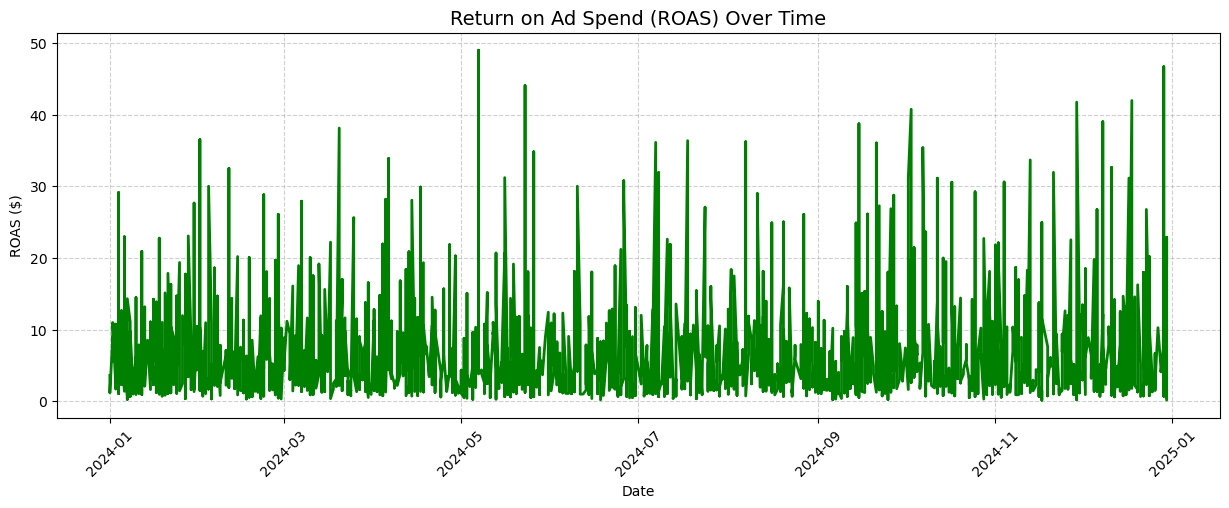

In [32]:
# Plot the new data set
df = df.sort_values('date') # to avoid the line from zig-zagging
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df['date'], df['return_on_ad_spend'], color='green', linewidth=2)

# Adding labels
plt.title('Return on Ad Spend (ROAS) Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('ROAS ($)')
plt.grid(True, linestyle='--', alpha=0.6) # Adds a subtle grid for easier reading
plt.xticks(rotation=45) # Tilts dates so they don't overlap

plt.show()

Due to graphic noise, I separated ROAS by Platform using AI help.

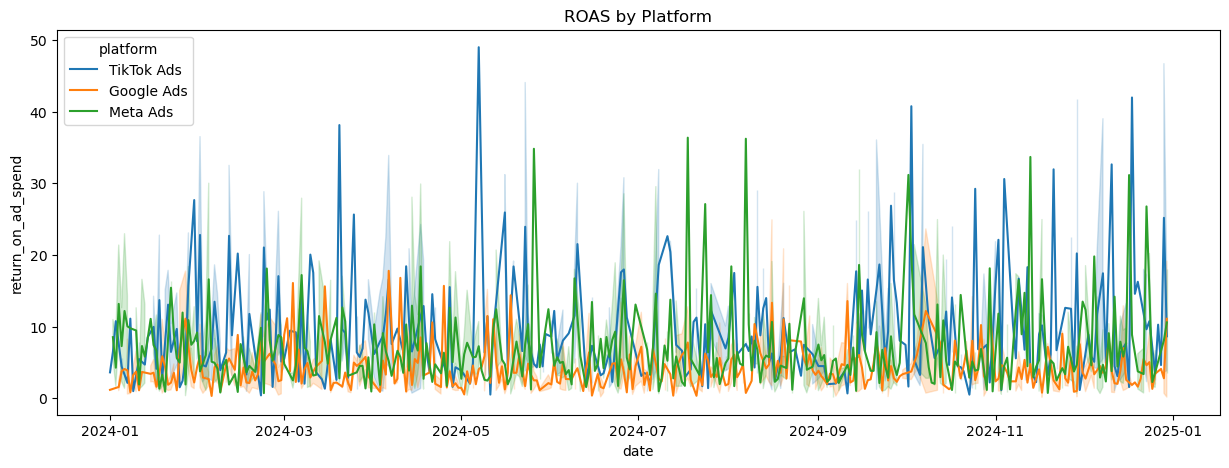

In [34]:
import seaborn as sns

plt.figure(figsize=(15,5))
# Separate the ROAS into three distinct, readable lines
sns.lineplot(data=df, x='date', y='return_on_ad_spend', hue='platform')
plt.title('ROAS by Platform')
plt.show()

### Smoothing the data

As noise persisted, I grouped the data my month

C:\Users\Aricia\AppData\Local\Temp\ipykernel_12680\787385768.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_roas = df_time['return_on_ad_spend'].resample('M').mean()


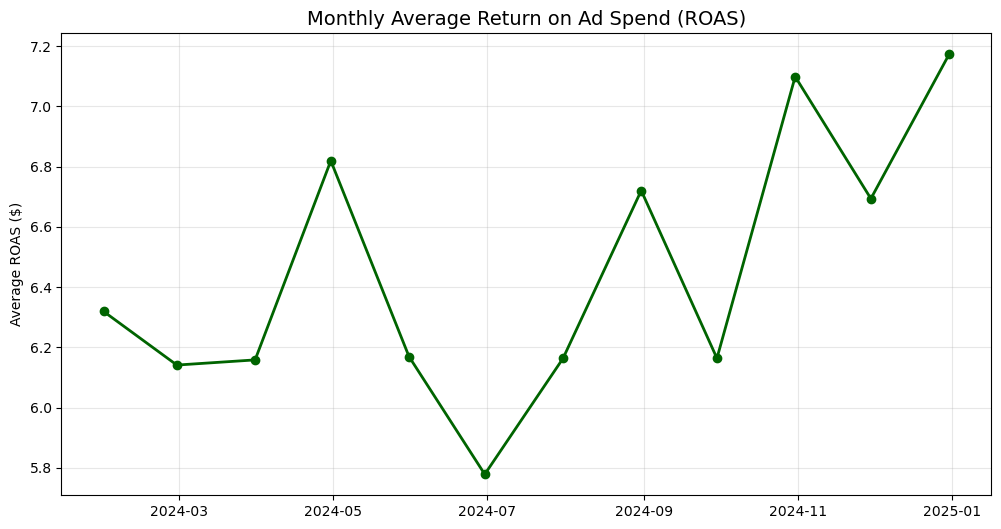

In [52]:
# 1. Ensure Date is the index (required for resample)

df_time = df.set_index('date')



# 2. Group by Month ('M') and calculate the mean

monthly_roas = df_time['return_on_ad_spend'].resample('M').mean()



# 3. Plot the clean version

plt.figure(figsize=(12,6), dpi=100)

plt.plot(monthly_roas.index, monthly_roas.values, marker='o', linestyle='-', color='darkgreen', linewidth=2)



plt.title('Monthly Average Return on Ad Spend (ROAS)', fontsize=14)

plt.ylabel('Average ROAS ($)')

plt.grid(True, alpha=0.3)

plt.show()

## 5 Time-series analysis: decomposition

Decomposition: considering the model type is non-linear due to clear fluctuations, the multiplicative model will be used.

In [53]:
# Ensure the frequency is explicitly set 
# Since we used .resample('M'), we set it to 'M'
monthly_roas.index.freq = 'M'

C:\Users\Aricia\AppData\Local\Temp\ipykernel_12680\4234308488.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_roas.index.freq = 'M'


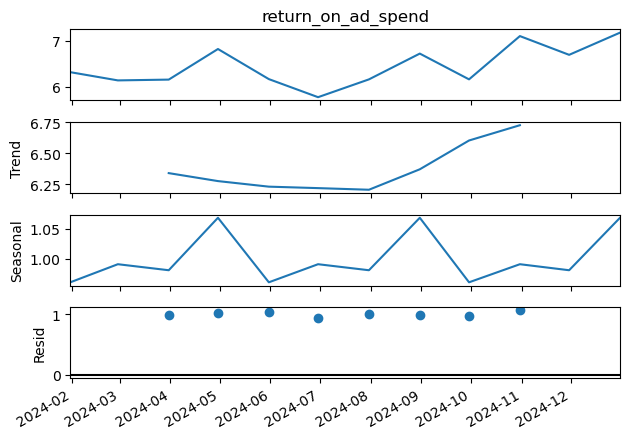

In [59]:
# Decompose the time series using a multiplicative model
# Setting period=4 looks for quarterly patterns instead of yearly
decomposition = sm.tsa.seasonal_decompose(monthly_roas, model='multiplicative', period=4)
fig = decomposition.plot()

# Set the dates on layout
fig.autofmt_xdate()
plt.show()

By decomposing the data's components, we can analyse the following:
1- The first chart is the level, which is the data itself including all the components.
2- On the second chart we can observe the trend, which differs from the level, due to the noise on the first one. We can see a small decline on returns until August, followed by a steep increase starting on the same month, showing that ROAS are aggresively higher on the second semester, offering a U-shaped recovery.
3- Regarding seasonality, on the third graphic we set a 4-month cycle. This means that every 4 data point we can see seasonal fluctuations represented by a small spike, followed by a big spike curve, that changes at a regular interval, showing a predictable cycle.
4- Finally, on the last graphic, we have the residual, which represents the noise on the data. There are consistent dots on the 1.0 line, which means that there is little unexplained noise, and the trend and seasonality are reliable, as the marketing is very predictable.

## 6 Testing for stationary

In [57]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df['return_on_ad_spend'])

Dickey-Fuller Stationarity test:
Test Statistic                  -19.884606
p-value                           0.000000
Number of Lags Used               4.000000
Number of Observations Used    1795.000000
Critical Value (1%)              -3.433998
Critical Value (5%)              -2.863152
Critical Value (10%)             -2.567628
dtype: float64


By testing the stationary, we can notice:
1- Test statistic: the test statistic number is a lot smaller (much more negative) than any critical value, which means that the null hypothesis can be rejected. This means that we have a great level of confidence that the stationary is real.
2- P-value = 0, also confirms that we have a high level of significance.
3- We used 1795 observations, which is a relatively large sample size, making the test results reliable.

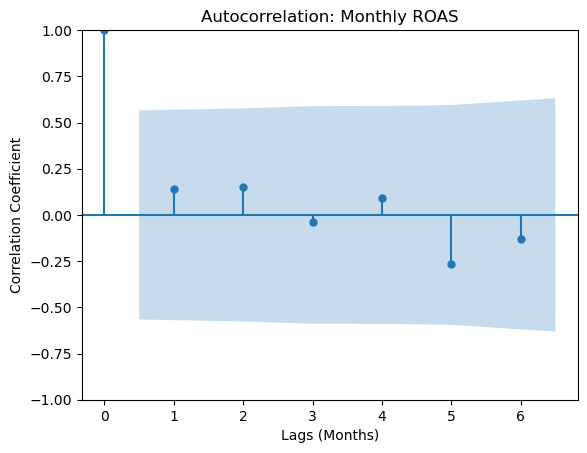

In [70]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

# 1. Use the specific numeric Series and drop any NaNs
plot_acf(monthly_roas.dropna())

# 2. Add labels so you can read it clearly
plt.title('Autocorrelation: Monthly ROAS')
plt.xlabel('Lags (Months)')
plt.ylabel('Correlation Coefficient')

plt.show()

The autocorrelation graphic confirms that we have a high confidence data, as all the datapoints (1-6) are inside the blue confidence interval. This means that not only the data is stationary, but the stationarity is strong.